In [1]:
from alhazen import Alhazen

from alhazen_formalizations.calculator import initial_inputs, grammar_alhazen as grammar, prop
from alhazen.helper import show_tree

In [2]:
MAX_ITERATION = 30
alhazen = Alhazen(
    initial_inputs=initial_inputs,
    grammar=grammar,
    evaluation_function=prop,
    max_iter=MAX_ITERATION
)
trees = alhazen.run()

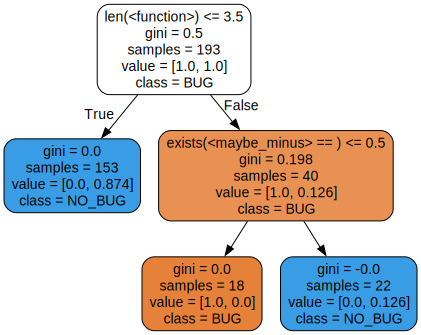

In [3]:
from alhazen.feature_collector import Collector
collector = Collector(grammar=grammar)

show_tree(trees[MAX_ITERATION-1], alhazen._all_features)